## Visual Secret Sharing

This program creates 2 images when they are superimposed on each other a secret message emarges

In [2]:
# import all the usual suspects
import numpy as np
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [3]:
# height width

h,w = 4,4

s1 = np.zeros([h,w],dtype="int64")

for i in range(h):
    for j in range(w):
        s1[i,j] = np.random.choice([0, 1])
# s1 = np.ones([h,w]) - s1
s1

array([[1, 1, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [0, 0, 1, 1]])

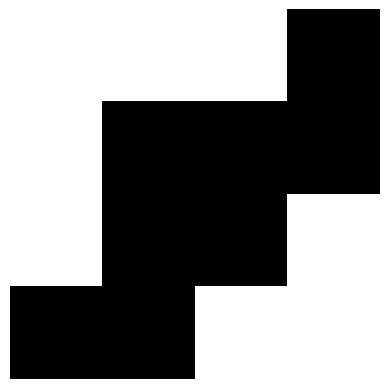

In [4]:
plt.imshow(s1, cmap='gray', vmin=0, vmax=1)
plt.axis('off')  # Optional: remove axis ticks
plt.show()


In [5]:
secret = np.zeros([h,w],dtype='int64')
secret[0,0] = 1
secret[0,1] = 1
secret[0,2] = 1
secret[1,1] = 1
secret[2,1] = 1



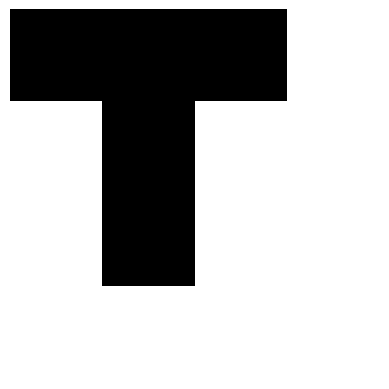

In [6]:
plt.imshow(np.ones([h,w])-secret, cmap='gray', vmin=0, vmax=1)
plt.axis('off')  # Optional: remove axis ticks
plt.show()

In [10]:
#encode the secret
s2 = (s1 + secret) % 2 
s2

array([[0, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 1],
       [0, 0, 1, 1]])

In [9]:
# create visual secret share
def create_vss(s):
    z_pat = np.zeros([2,2])
    z_pat[0,1] = 1
    z_pat[1,0] = 1
    o_pat = np.zeros([2,2])
    o_pat[0,0] = 1
    o_pat[1,1] = 1

    A = np.zeros([s.shape[0]*2,s.shape[1]*2],dtype='int64')
    for i in range (s.shape[0]):
        for j in range (s.shape[1]):
            if s[i,j]==0:
                #copy 0 pattern
                A[i*2:i*2+2,j*2:j*2+2] = z_pat
            else:
                A[i*2:i*2+2,j*2:j*2+2] = o_pat
    return A

In [11]:
vss1 = create_vss(create_vss(create_vss(s1)))
vss1

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]])

In [12]:
vss2 =  create_vss(create_vss(create_vss(s2)))
vss2

array([[0, 1, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]])

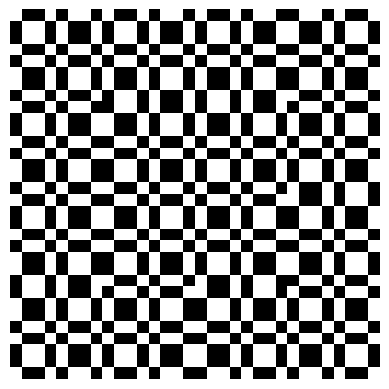

In [13]:
vss = vss1
rgba = np.zeros((vss.shape[0], vss.shape[1], 4))
rgba[vss == 0] = [0, 0, 0, 1]

plt.imshow(rgba)

plt.axis('off')

#plt.show()
# Create a figure with specific size
fig = plt.figure(figsize=(4, 4), dpi=300)
plt.imshow(rgba)
# plt.axis('off')

# Save without extra padding or borders
plt.savefig('S1.png', dpi=100, bbox_inches='tight', pad_inches=0, transparent=True)
plt.close(fig)

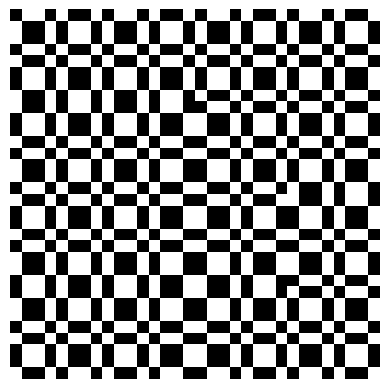

In [14]:
vss = vss2
rgba = np.zeros((vss.shape[0], vss.shape[1], 4))
rgba[vss == 0] = [0, 0, 0, 1]

plt.imshow(rgba)

plt.axis('off')

#plt.show()
# Create a figure with specific size
fig = plt.figure(figsize=(4, 4), dpi=300)
plt.imshow(rgba)
# plt.axis('off')

# Save without extra padding or borders
plt.savefig('S2.png', dpi=100, bbox_inches='tight', pad_inches=0, transparent=True)
plt.close(fig)